In [31]:
import numpy as np
from math import sqrt
import random
import matplotlib.pyplot as plt
import os

### Dataset: Circle

In [21]:
# generate random points in a circle
num_samples = 50
radius = 1

# make a simple unit circle 
theta = np.linspace(0, 2*np.pi, num_samples)
a, b = radius * np.cos(theta), radius * np.sin(theta)
c = np.concatenate((a.reshape(num_samples,1), b.reshape(num_samples,1)), axis=1)

# fig, ax = plt.subplots(figsize=(5,5))
# # plt.figure(figsize=(7,6))
# ax.plot(c[:, 0], c[:, 1], marker='o', linewidth=0, color='red')
# plt.show()
np.random.shuffle(c)
CITIES = c
INITIAL_CITY = CITIES[0]
CITIES_COUNT = num_samples
OPTIMAL = 2 * np.pi * radius
CITIES.shape

(50, 2)

### Dataset: Djibouti Tour
https://www.math.uwaterloo.ca/tsp/world/countries.html#DJ    
https://www.math.uwaterloo.ca/tsp/world/djtour.html    
Optimal Length is 6656

In [27]:
dj38 = []
with open('./dj38_data.txt', 'r') as f:
    data = f.read()
points = data.split('\n')
for p in points:
    a,b = map(float, p.split(' '))
    dj38.append([a,b])
CITIES = np.array(dj38)
INITIAL_CITY = CITIES[0]
CITIES_COUNT = 38
OPTIMAL = 6656
CITIES.shape

(38, 2)

### Dataset: Club estabilished cities 

In [32]:
c = []
with open('./club_data.txt', 'r') as f:
    data = f.read()
points = data.split('\n')
for p in points:
    a,b = map(int, p.split(' '))
    c.append([a,b])
CITIES = np.array(c, dtype='int32')
INITIAL_CITY = CITIES[0]
CITIES_COUNT = 40
OPTIMAL = None
CITIES.shape

(40, 2)

### Dataset: Random

In [19]:
CITIES_COUNT = 40
np.random.seed()

CITIES = np.random.randint(-9,10, size=(1,2))
while (CITIES.shape != (CITIES_COUNT,2)):
    n = np.random.randint(-9,10, size=(2,))
    if not any(np.equal(CITIES, n).all(1)):
        CITIES = np.append(CITIES, n.reshape(1,2), axis=0)     
        
INITIAL_CITY = CITIES[0]
OPTIMAL = None
CITIES.shape

(7, 2)

### Prints a sorted copy of cities

In [3]:
# Returns cities sorted 
a = CITIES.copy()
a = a[a[:,1].argsort()]
a = a[a[:,0].argsort(kind='mergesort')] #stable sort needed
print(a)

[[11003.6111 42102.5   ]
 [11108.6111 42373.8889]
 [11133.3333 42885.8333]
 [11155.8333 42712.5   ]
 [11183.3333 42933.3333]
 [11297.5    42853.3333]
 [11310.2778 42929.4444]
 [11416.6667 42983.3333]
 [11423.8889 43000.2778]
 [11438.3333 42057.2222]
 [11461.1111 43252.7778]
 [11485.5556 43187.2222]
 [11503.0556 42855.2778]
 [11511.3889 42106.3889]
 [11522.2222 42841.9444]
 [11569.4444 43136.6667]
 [11583.3333 43150.    ]
 [11595.     43148.0556]
 [11600.     43150.    ]
 [11690.5556 42686.6667]
 [11715.8333 41836.1111]
 [11751.1111 42814.4444]
 [11770.2778 42651.9444]
 [11785.2778 42884.4444]
 [11822.7778 42673.6111]
 [11846.9444 42660.5556]
 [11963.0556 43290.5556]
 [11973.0556 43026.1111]
 [12058.3333 42195.5556]
 [12149.4444 42477.5   ]
 [12286.9444 43355.5556]
 [12300.     42433.3333]
 [12355.8333 43156.3889]
 [12363.3333 43189.1667]
 [12372.7778 42711.3889]
 [12386.6667 43334.7222]
 [12421.6667 42895.5556]
 [12645.     42973.3333]]


# Variables

In [33]:
POPULATION_SIZE = 500
OFFSPRING_SIZE = POPULATION_SIZE
GENERATIONS = 1500
MUTATION_CHANCE = .3
NUM_REPORTS = 10
ELITISM = 2

CROSSOVER_METHOD = crossover_ordinary
#CROSSOVER_METHOD = crossover_old

# MUTATE_METHOD = no_mutation 
# MUTATE_METHOD = swap_mutate
MUTATE_METHOD = flip_mutation

PARENT_SELECTION_METHOD = random_selection

SURVIVAL_METHOD = kill_weakest
# SURVIVAL_METHOD = k_elitism

## Run genetic alg

In [34]:
np.random.seed()
random.seed()
best_answer = run_ga(CROSSOVER_METHOD, MUTATE_METHOD, PARENT_SELECTION_METHOD, SURVIVAL_METHOD)
print(f"Best length: {best_answer.f:.4f}")

#if an optimal length is known 
if OPTIMAL is not None:
    print(f"Optimal Length: {OPTIMAL:.4f}, {100*(OPTIMAL / best_answer.f):.2f} %")

Generation 0: 1679.6800
Generation 150: 508.4546
Generation 300: 508.2890
Generation 450: 508.2890
Generation 600: 508.2890
Generation 750: 508.2890
Generation 900: 508.2890
Generation 1050: 508.2890
Generation 1200: 508.2890
Generation 1350: 508.2890
500
Best length: 508.2890


In [40]:
print(INITIAL_CITY)

[ 1 39]


In [45]:
best_answer.path

array([[75, 55],
       [70, 65],
       [95, 70],
       [79, 76],
       [71, 81],
       [69, 84],
       [62, 70],
       [57, 81],
       [49, 90],
       [42, 85],
       [34, 83],
       [30, 88],
       [24, 82],
       [14, 78],
       [16, 78],
       [26, 79],
       [38, 71],
       [36, 63],
       [32, 61],
       [24, 48],
       [15, 52],
       [ 2, 43],
       [ 1, 39],
       [ 2,  8],
       [ 1,  2],
       [ 4,  4],
       [19, 20],
       [42, 33],
       [45, 26],
       [36,  9],
       [46, 10],
       [59, 25],
       [66, 12],
       [86,  1],
       [97,  2],
       [97, 21],
       [89, 37],
       [81, 35],
       [77, 28],
       [75, 34],
       [75, 55]])

## Show Final Path

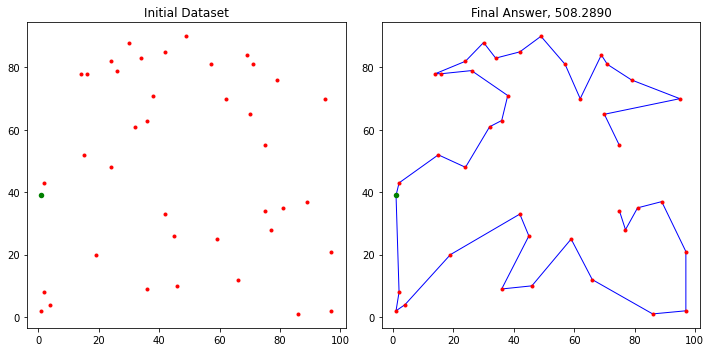

In [41]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,5))
s = best_answer.path
ax1.plot(CITIES[:, 0], CITIES[:, 1], marker='o', linewidth=0, color='red', ms=3)
ax1.plot(INITIAL_CITY[0], INITIAL_CITY[1], marker='.', mew=3, ms=5, linewidth=0, color='green')
ax1.set(title='Initial Dataset')

ax2.plot(s[:-1, 0], s[:-1, 1], marker='o', color='b', mfc='r',mec='r', ms=3, linewidth=1)
ax2.plot(INITIAL_CITY[0], INITIAL_CITY[1], marker='.', mew=3, ms=5, linewidth=0, color='green')
ax2.set(title=f'Final Answer, {best_answer.f:.4f}')

fig.tight_layout()
plt.show()

# Genetic Alg definition

In [11]:
def run_ga(crossover, mutate, parent_selection, survival):
    population = [Route() for _ in range(POPULATION_SIZE)]
    population.sort(key=lambda x: x.f)

    for generation in range(GENERATIONS):
        parents = parent_selection(population)
        children = []
        for i in range(0,len(parents)-2,2):
            c = crossover(parents[i], parents[i+1])
            if random.random() < MUTATION_CHANCE:
                c = mutate(c)
            children.append(c)

        population = survival(population, children)
        #population.sort(key=lambda x: x.f)
        if(generation % (GENERATIONS // NUM_REPORTS) == 0):
            print(f"Generation {generation}: {population[0].f:.4f}")
    result = population[0]
    print(len(population))
    
    a,b = np.where(result.path[:,0] == INITIAL_CITY[0]), np.where(result.path[:,1] == INITIAL_CITY[1])
    split = int(np.intersect1d(a,b))
    path_ans = np.append(result.path[:split], result.path[split:], axis=0)
    best_answer = Route(path_ans)
    best_answer.path = np.append(result.path, result.path[0].reshape(1,2), axis=0)
    return best_answer

## Route Definitions

In [4]:
class Route:
    def __init__(self, path=None):
        if path is not None:
            self.path = path #numpy int array of shape (CITIES_COUNT,2)
        else:
            p = CITIES.copy()
            np.random.shuffle(p)
            self.path = p 
        self.f = self.fitness() #float scalar 
        
    def fitness(self):
        shifted = np.append(self.path[1:], self.path[:1], axis=0)
        squared_comp = np.square((np.subtract(self.path,shifted)))
        out = np.sum(np.sqrt(np.sum(squared_comp,axis=1)))
        return out
            
    def __str__(self):
        return f"Route: {self.path}; Fitness: {self.f:.5f}"
    
    def __repr__(self):
        return f"Route at {hex(id(self))}"  #; Fitness: {self.f:.5f}"  

## Parent Selection

In [5]:
def random_selection(population):
    mating_pool = []
    for i in range(2*OFFSPRING_SIZE):
        mating_pool.append(random.choice(population))
    return mating_pool

## Crossovers

In [6]:
#Begin with a selection from one, fill in missing
def crossover_old(p1, p2):
    a,b = np.random.randint(0,CITIES_COUNT, size=(2,), dtype='int32')
    p1_dna = np.array(p1.path[min(a,b):max(a,b)])
    # TODO find a faster way to do this
    missing_cities = np.array([city for city in p2.path if not any(np.equal(p1_dna, city).all(1))])
    if missing_cities.shape == (0,):
        return Route(np.array(p1_dna))
    return Route(np.append(p1_dna, missing_cities, axis=0))

#Take a selection from one and fill in before and after
def crossover_ordinary(p1, p2):
    a,b = np.random.randint(0,CITIES_COUNT, size=(2,), dtype='int32')
    start = min(a,b)
    stop = max(a,b)
    if stop - start == CITIES_COUNT-1:
        return p1
    p1_dna = np.array(p1.path[start:stop])
    missing_cities = np.array([city for city in p2.path if not any(np.equal(p1_dna, city).all(1))])
    t = np.append(missing_cities[:start], p1_dna, axis=0)
    return Route(np.append(t, missing_cities[start:], axis=0))

## Mutations

In [7]:
def no_mutation(r):
    return r

def swap_mutate(r):
    dna = r.path
    a,b = np.random.randint(0,len(r.path), size=(2,), dtype='int32')
    t = dna[a].copy()
    dna[a] =  dna[b]
    dna[b] = t
    return Route(dna)


def flip_mutation(r):
    #pick two random points and flip the subarray bounded by those
    #Example: If the sequence is [A,B,C,D,E,F] and B and E are selected,
    #the new sequence is [A,E,D,C,B,F]  
    dna = r.path
    i,j = np.random.randint(0,CITIES_COUNT, size=(2,), dtype='int32')
    start = min(i,j)
    stop = max(i,j)
    out = np.append(dna[:start], dna[start:stop][::-1], axis=0)
    out = np.append(out, dna[stop:], axis=0)
    return Route(out)

## Survival Method - must sort

In [8]:
def kill_weakest(population, children):
    return sorted(population+children, key=lambda x:x.f)[:POPULATION_SIZE]

def k_elitism(population, children):
    #return population[:ELITISM] + sorted(children, key=lambda x: x.f)[:POPULATION_SIZE-ELITISM]
    return sorted(population[:ELITISM] + children, key=lambda x: x.f)[:POPULATION_SIZE]